<a href="https://colab.research.google.com/github/JanaElgharib/Data-Processing-and-Analysis/blob/main/Mall_Customers_Dataset_Unsupervised_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap

In [ ]:
# Loading DataSet
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#just for checkinggg
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

print("Columns with missing values:")
print(columns_with_missing_values)
print("\nNumber of missing values per column:")
print(df[columns_with_missing_values].isnull().sum())

#thus, no missing columns

Columns with missing values:
Index([], dtype='object')

Number of missing values per column:
Series([], dtype: float64)


In [ ]:
# standardize

# droping ID column (no need in clustering)
df_clean = df.drop(['CustomerID'], axis=1)

# Identify numerical columns
numerical_cols = df_clean.select_dtypes(include=np.number).columns

# One-hot encoding (drop one column to avoid redundancy)
df_encoded = pd.get_dummies(df_clean, columns=['Genre'], drop_first=True)
# standardising the whole thing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

In [ ]:
# Using PCA to reduce the dataset to 2 dimensions

# Apply PCA with 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
df_pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

df_pca_df

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


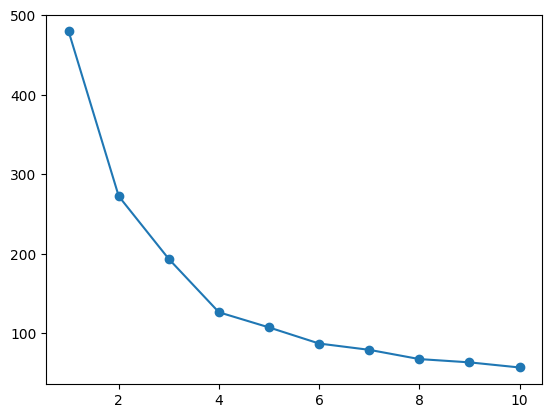

In [ ]:
#Determining the Optimal no. of clusters
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.show()

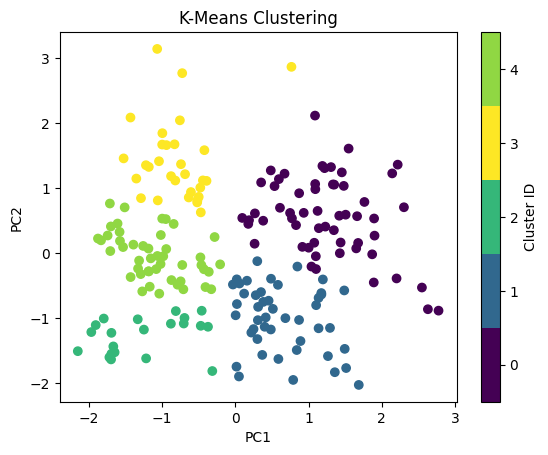

In [ ]:
#Model training with K-Means
kmean = KMeans(n_clusters=5, random_state=42)
kmean.fit(df_pca)

# Define exact viridis colors for 5 clusters
viridis_discrete = ListedColormap([
    '#440154',  # Dark Purple (0)
    '#31688E',  # Teal (1)
    '#35B779',  # Green (2)
    '#FDE725',  # Yellow (3)
    '#90D743'   # Light Green (4)
])

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmean.labels_,  cmap=viridis_discrete,
            vmin=-0.5,  # Ensures exact color mapping
            vmax=4.5)
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add colorbar legend
# Add colorbar legend
cbar = plt.colorbar(ticks=[0,1,2,3,4])
cbar.set_label('Cluster ID')

plt.show()

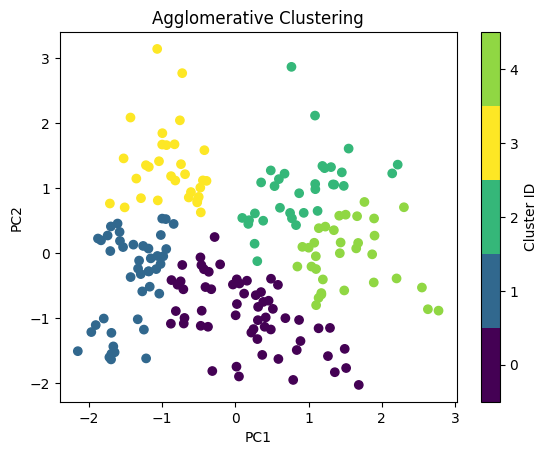

In [ ]:
# Model training with Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_clustering.fit(df_pca)

# Define exact viridis colors for 5 clusters
viridis_discrete = ListedColormap([
    '#440154',  # Dark Purple (0)
    '#31688E',  # Teal (1)
    '#35B779',  # Green (2)
    '#FDE725',  # Yellow (3)
    '#90D743'   # Light Green (4)
])

# Visualize the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agg_clustering.labels_, cmap=viridis_discrete,
            vmin=-0.5,  # Ensures exact color mapping
            vmax=4.5)
plt.title('Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add colorbar legend
cbar = plt.colorbar(ticks=[0,1,2,3,4])
cbar.set_label('Cluster ID')

plt.show()


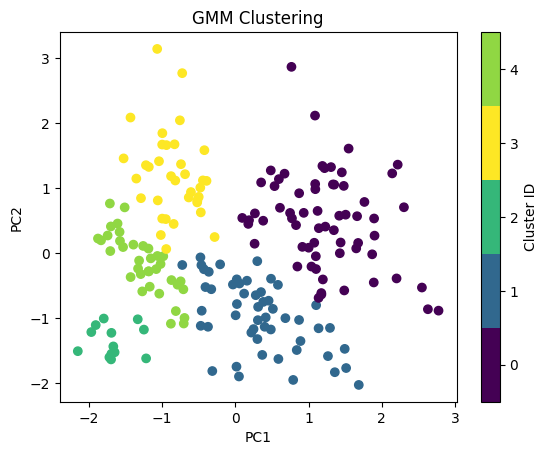

In [ ]:
# Model training with Gaussian Mizture Model (GMM)
GaussianMixture = GaussianMixture(n_components=5, random_state=42)
GaussianMixture.fit(df_pca)

# Define exact viridis colors for 5 clusters
viridis_discrete = ListedColormap([
    '#440154',  # Dark Purple (0)
    '#31688E',  # Teal (1)
    '#35B779',  # Green (2)
    '#FDE725',  # Yellow (3)
    '#90D743'   # Light Green (4)
])

# Visualize the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=GaussianMixture.predict(df_pca), cmap=viridis_discrete,
            vmin=-0.5,  # Ensures exact color mapping
            vmax=4.5)
plt.title('GMM Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add colorbar legend
cbar = plt.colorbar(ticks=[0,1,2,3,4])
cbar.set_label('Cluster ID')

plt.show()


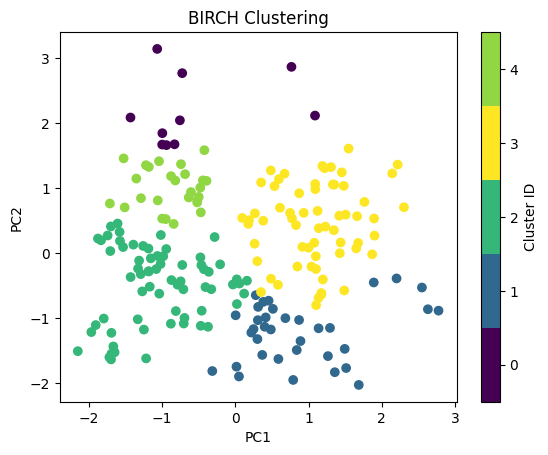

In [ ]:
# Model training with BIRCH (Bad outcome)

from sklearn.cluster import Birch

# Model training with BIRCH
birch = Birch(n_clusters=5)
birch.fit(df_pca)

# Define exact viridis colors for 5 clusters
viridis_discrete = ListedColormap([
    '#440154',  # Dark Purple (0)
    '#31688E',  # Teal (1)
    '#35B779',  # Green (2)
    '#FDE725',  # Yellow (3)
    '#90D743'   # Light Green (4)
])

# Visualize the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=birch.labels_, cmap=viridis_discrete,
            vmin=-0.5,  # Ensures exact color mapping
            vmax=4.5)
plt.title('BIRCH Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add colorbar legend
cbar = plt.colorbar(ticks=[0,1,2,3,4])
cbar.set_label('Cluster ID')

plt.show()


In [ ]:
# Evaluating each clustering method using:– Silhouette Score– Davies-Bouldin Index
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate KMeans
kmeans_labels = kmean.labels_
kmeans_silhouette = silhouette_score(df_pca, kmeans_labels)
kmeans_db = davies_bouldin_score(df_pca, kmeans_labels)

print("KMeans Clustering Results:-")
print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"KMeans Davies-Bouldin Index: {kmeans_db}")

# Evaluate Agglomerative Clustering
agg_labels = agg_clustering.labels_
agg_silhouette = silhouette_score(df_pca, agg_labels)
agg_db = davies_bouldin_score(df_pca, agg_labels)

print("\nAgglomerative Clustering Results:-")
print(f"Agglomerative Silhouette Score: {agg_silhouette}")
print(f"Agglomerative Davies-Bouldin Index: {agg_db}")

# Evaluate Gaussian Mixture Model
gmm_labels = GaussianMixture.predict(df_pca)
gmm_silhouette = silhouette_score(df_pca, gmm_labels)
gmm_db = davies_bouldin_score(df_pca, gmm_labels)

print("\nGMM Results:-")
print(f"GMM Silhouette Score: {gmm_silhouette}")
print(f"GMM Davies-Bouldin Index: {gmm_db}")

# Evaluate BIRCH
birch_labels = birch.labels_
birch_silhouette = silhouette_score(df_pca, birch_labels)
birch_db = davies_bouldin_score(df_pca, birch_labels)

print("\nBIRCH Results:-")
print(f"BIRCH Silhouette Score: {birch_silhouette}")
print(f"BIRCH Davies-Bouldin Index: {birch_db}")


# We were skeptical chosing between K-Means and GMM:-
"""
  Based on the evaluation metrics and visualizations, the KMeans algorithm appears to be
  more suitable for this dataset because it has the highest silhouette score of (0.40)
  and second lowest Davies Bouldin score of (0.84) (lowest was GMM of (0.79)).
  However The clusters are clearly defined and well separated for K-Means than GMM;
  as GMM has some points from different clusters touching .
"""


KMeans Clustering Results:-
KMeans Silhouette Score: 0.4037689372474676
KMeans Davies-Bouldin Index: 0.8469946082836615

Agglomerative Clustering Results:-
Agglomerative Silhouette Score: 0.34581930903235936
Agglomerative Davies-Bouldin Index: 0.9111091786283184

GMM Results:-
GMM Silhouette Score: 0.3776271496315921
GMM Davies-Bouldin Index: 0.7932728248800919

BIRCH Results:-
BIRCH Silhouette Score: 0.33497119816861703
BIRCH Davies-Bouldin Index: 0.9480832150075662


'\n  Based on the evaluation metrics and visualizations, the KMeans algorithm appears to be \n  more suitable for this dataset because it has the highest silhouette score of (0.40) \n  and second lowest Davies Bouldin score of (0.84) (lowest was GMM of (0.79)).\n  However The clusters are clearly defined and well separated for K-Means than GMM;\n  as GMM has some points from different clusters touching .\n'

#Customer Profiles

In [ ]:
# Customer profiles for K-Means
df1 = pd.DataFrame(scaled_data, columns=df_encoded.columns)
df1.head()
df1['K.Means_Cluster'] = kmean.labels_
cluster_centers = df1.groupby('K.Means_Cluster').mean()
cluster_centers


,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
K.Means_Cluster,,,,
0,0.739763,0.368355,-0.833914,0.704035
1,0.680067,-0.530854,-0.501473,-0.755021
2,-0.840183,-1.135559,0.696570,-0.886405
3,-0.558584,0.959579,0.876073,0.859544
4,-0.848875,-0.032992,0.645451,-0.273279


## K-Means Clustering Analysis

### **Cluster 0 (Dark Purple) - Conservative Older Males**  
- **Age:** High (0.74σ)  
- **Income:** Slightly above average (0.37σ)  
- **Spending:** Low (-0.83σ)  
- **Gender:** Mostly Male (0.70σ)  
- **Profile:** Older males with moderate income but minimal spending  
- **Suggested Action:** Reactivate with loyalty programs  

### **Cluster 1 (Teal) - Budget-Conscious Females**  
- **Age:** Slightly above average (0.68σ)  
- **Income:** Below average (-0.53σ)  
- **Spending:** Below average (-0.50σ)  
- **Gender:** Mostly Female (-0.76σ)  
- **Profile:** Middle-aged females with limited spending power  
- **Suggested Action:** Target with products on sale

### **Cluster 2 (Green) - Young Trend Shoppers**  
- **Age:** Young (-0.84σ)  
- **Income:** Very low (-1.14σ)  
- **Spending:** High (0.70σ)  
- **Gender:** Strongly Female (-0.89σ)  
- **Profile:** Students/young adults prioritizing trends over savings  
- **Suggested Action:** Offer BNPL and trendy discounts  

### **Cluster 3 (Yellow) - Premium Customers**  
- **Age:** Young (-0.56σ)  
- **Income:** Very high (0.96σ)  
- **Spending:** Very high (0.88σ)  
- **Gender:** Strongly Male (0.86σ)  
- **Profile:** Affluent young male spenders  
- **Suggested Action:** Target with luxury products/exclusive offers  

### **Cluster 4 (Light Green) - Young Free Spenders**  
- **Age:** Youngest (-0.85σ)  
- **Income:** Average (-0.03σ)  
- **Spending:** High (0.65σ)  
- **Gender:** Slightly Female (-0.27σ)  
- **Profile:** Early-career individuals spending freely  
- **Suggested Action:** Monitor for emerging trends  

---


In [ ]:
# Customer profiles for Agglomerative
df1 = pd.DataFrame(scaled_data, columns=df_encoded.columns)
df1.head()
df1['Agg_Cluster'] = agg_clustering.labels_
cluster_centers = df1.groupby('Agg_Cluster').mean()
cluster_centers

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
Agg_Cluster,,,,
0,0.161597,-0.565451,-0.311099,-0.715680
1,-0.925464,-0.415214,0.978656,-0.428551
2,0.091231,0.906258,-0.999479,0.639775
3,-0.563369,0.925473,0.980307,0.738238
4,1.383031,-0.211065,-0.670084,0.517680


## Agglomerative Clustering Analysis

### **Cluster 0 (Dark Purple)  - Family Conservative**   
- **Age:** Slightly above average (0.16σ)  
- **Income:** Below average (-0.57σ)  
- **Spending:** Below average (-0.31σ)  
- **Gender:** Mostly Female (-0.72σ)  
- **Profile:** Average-aged, lower-income females with conservative spending habits.
- **Suggested Action:** Offer needs and not wants


### **Cluster 1 (Teal)  - Young Trend-Driven Spenders**  
- **Age:** Younger than average (-0.93σ)  
- **Income:** Below average (-0.42σ)  
- **Spending:** Very high (0.98σ)  
- **Gender:** Slightly Female (-0.43σ)  
- **Profile:** Young, lower-income individuals who spend aggressively.
- **Suggested Action:** Offer BNPL plans and trendy products

### **Cluster 2 (Green)  - Middle Aged Conseverative Males**
- **Age:** Near average (0.09σ)  
- **Income:** High (0.91σ)  
- **Spending:** Very low (-1.00σ)  
- **Gender:** Mostly Male (0.64σ)  
- **Profile:** High-income males who spend very little (savers).
- **Suggested Action:** Target with needs not wants

### **Cluster 3 (Yellow) - Affluent Young Professionals**  
- **Age:** Younger than average (-0.56σ)  
- **Income:** Very high (0.93σ)  
- **Spending:** Very high (0.98σ)  
- **Gender:** Mostly Male (0.74σ)  
- **Profile:** Young, affluent males (premium customers).
- **Suggested Action:** Target with luxury items.

### **Cluster 4 (Light Green) - Conservative Older Males**
- **Age:** Oldest (1.38σ)  
- **Income:** Slightly below average (-0.21σ)  
- **Spending:** Low (-0.67σ)  
- **Gender:** Mostly Male (0.52σ)  
- **Profile:** Older males with minimal spending (retirees?).
- **Suggested Action:** Reactivate with loyalty programs.


In [ ]:
# Customer Profiles for GMM
df1 = pd.DataFrame(scaled_data, columns=df_encoded.columns)
df1.head()
df1['GMM_Cluster'] = GaussianMixture.predict(df_pca)
cluster_centers = df1.groupby('GMM_Cluster').mean()
cluster_centers

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
GMM_Cluster,,,,
0,0.732917,0.348988,-0.846674,0.624513
1,0.348897,-0.561619,-0.381049,-0.731439
2,-0.960846,-1.330880,1.177786,-0.886405
3,-0.608479,0.721293,0.878476,0.782799
4,-0.868377,-0.029857,0.776216,-0.494686


## Gaussian Mixture Model (GMM) Clustering Analysis

## Cluster Characteristics

### **Cluster 0 (Dark Purple) - Established Conservative Males**
- **Age:** High (0.73σ) → Older demographic  
- **Income:** Slightly above average (0.35σ)  
- **Spending:** Very low (-0.85σ)  
- **Gender:** Predominantly Male (0.62σ)  
- **Profile:** Older men with stable incomes but minimal discretionary spending  
- **Suggested Action:**  Reactivate with loyalty programs.


### **Cluster 1 (Teal) - Middle-Class Budgeters**  
- **Age:** Moderately high (0.35σ)  
- **Income:** Below average (-0.56σ)  
- **Spending:** Below average (-0.38σ)  
- **Gender:** Mostly Female (-0.73σ)  
- **Profile:** Middle-aged women prioritizing essentials  
- **Suggested Action:**  Suggest with needs not wants.

### **Cluster 2 (Green) - Young Trend-Driven Spenders**  
- **Age:** Very young (-0.96σ)  
- **Income:** Extremely low (-1.33σ)  
- **Spending:** Exceptionally high (1.18σ)  
- **Gender:** Strongly Female (-0.89σ)  
- **Profile:** Young women with high spending and low income
- **Suggested Action:**  Offer BNPL plans.

### **Cluster 3 (Yellow) - Affluent Young Professionals**  
- **Age:** Young (-0.61σ)  
- **Income:** High (0.72σ)  
- **Spending:** Very high (0.88σ)  
- **Gender:** Predominantly Male (0.78σ)  
- **Profile:** Young male with high spending and high income  
- **Suggested Action:** Target with luxury items.

### **Cluster 4 (Light Green) - Young Balanced Spenders**  
- **Age:** Very young (-0.87σ)  
- **Income:** Near average (-0.03σ)  
- **Spending:** High (0.78σ)  
- **Gender:** Slightly Female (-0.49σ)  
- **Profile:** Young women with high spending and average income
- **Suggested Action:** Offer installment plans



In [ ]:
# Customer Profiles for birch
df1 = pd.DataFrame(scaled_data, columns=df_encoded.columns)
df1.head()
df1['Birch_Cluster'] = birch.labels_
cluster_centers = df1.groupby('Birch_Cluster').mean()
cluster_centers

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
Birch_Cluster,,,,
0,-0.556192,1.764954,0.667731,1.128152
1,0.804300,-0.839291,-0.696570,-0.656170
2,-0.726182,-0.365469,0.605848,-0.555657
3,0.697179,0.351085,-0.719075,0.510788
4,-0.659978,0.555571,0.834365,0.663254


## BIRCH Clustering Analysis

### **Cluster 0 (Dark Purple) - Ultra High-Income Spenders**
- **Age:** Young (-0.56σ)
- **Income:** Extremely high (1.76σ) → Top 5% earners
- **Spending:** High (0.67σ)
- **Gender:** Strongly Male (1.13σ)
- **Profile:** Ultra High Net Worth indiviual males with high spending.
- **Suggested Action:**  Target with luxuary products.

### **Cluster 1 (Teal) - Older Frugal Females**
- **Age:** High (0.80σ) → Oldest group
- **Income:** Low (-0.84σ)
- **Spending:** Very low (-0.70σ)
- **Gender:** Strongly Female (-0.66σ)
- **Profile:** Retirement-age budgeters.
- **Suggested Action:**  Reactivate with loyalty programs.

### **Cluster 2 (Green) - Young Urban Creatives**
- **Age:** Very young (-0.73σ)
- **Income:** Below average (-0.37σ)
- **Spending:** High (0.61σ)
- **Gender:** Female-leaning (-0.56σ)
- **Profile:** Artists/creatives prioritizing experiences.
- **Suggested Action:**  Offer BNPL plans.

### **Cluster 3 (Yellow) - Mid-Life Savers**
- **Age:** Above average (0.70σ)
- **Income:** Average (0.35σ)
- **Spending:** Very low (-0.72σ)
- **Gender:** Male-leaning (0.51σ)
- **Profile:** Family-focused savers.
- **Suggested Action:**  Offer wants not needs.

### **Cluster 4 (Light Green) - Affluent Young Adults**
- **Age:** Young (-0.66σ)
- **Income:** Above average (0.56σ)
- **Spending:** Very high (0.83σ)
- **Gender:** Male-leaning (0.66σ)
- **Profile:** Trust fund recipients/DINK's.
- **Suggested Action:**  Target trendy items with exclusive offers.

# Dendogram (Extra)

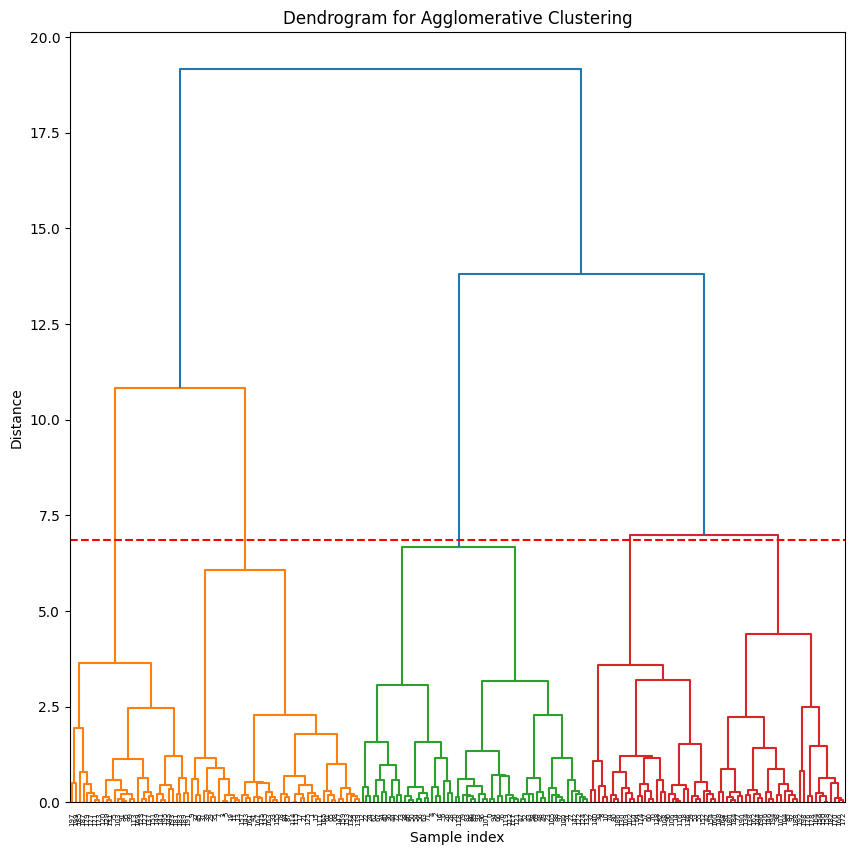

In [ ]:
# Dendogram shwoing the y-axix cut for the 5 clusters
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical/agglomerative clustering
Z = linkage(df_pca, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 10))
dendrogram(Z)

# Add a horizontal line at the distance where you want 5 clusters
plt.axhline(y=6.85, color='r', linestyle='--')  # Adjust y value based on your dendrogram

plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# To get the same number of clusters (5)
clusters = fcluster(Z, t=5, criterion='maxclust')
